# Getting The System Readdy

In [619]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from scipy import stats



## Loading The Data

In [620]:
df = pd.read_csv('../data/USA Housing Dataset.csv')

In [621]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-09 00:00:00,376000.00,3.00,2.00,1340,1384,3.00,0,0,3,1340,0,2008,0,9245-9249 Fremont Ave N,Seattle,WA 98103,USA
1,2014-05-09 00:00:00,800000.00,4.00,3.25,3540,159430,2.00,0,0,3,3540,0,2007,0,33001 NE 24th St,Carnation,WA 98014,USA
2,2014-05-09 00:00:00,2238888.00,5.00,6.50,7270,130017,2.00,0,0,3,6420,850,2010,0,7070 270th Pl SE,Issaquah,WA 98029,USA
3,2014-05-09 00:00:00,324000.00,3.00,2.25,998,904,2.00,0,0,3,798,200,2007,0,820 NW 95th St,Seattle,WA 98117,USA
4,2014-05-10 00:00:00,549900.00,5.00,2.75,3060,7015,1.00,0,0,5,1600,1460,1979,0,10834 31st Ave SW,Seattle,WA 98146,USA


# Inspecting The Data


In [622]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4140 entries, 0 to 4139
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4140 non-null   object 
 1   price          4140 non-null   float64
 2   bedrooms       4140 non-null   float64
 3   bathrooms      4140 non-null   float64
 4   sqft_living    4140 non-null   int64  
 5   sqft_lot       4140 non-null   int64  
 6   floors         4140 non-null   float64
 7   waterfront     4140 non-null   int64  
 8   view           4140 non-null   int64  
 9   condition      4140 non-null   int64  
 10  sqft_above     4140 non-null   int64  
 11  sqft_basement  4140 non-null   int64  
 12  yr_built       4140 non-null   int64  
 13  yr_renovated   4140 non-null   int64  
 14  street         4140 non-null   object 
 15  city           4140 non-null   object 
 16  statezip       4140 non-null   object 
 17  country        4140 non-null   object 
dtypes: float

In [623]:
df.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [624]:
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
price,4140.00,553062.88,583686.45,0.00,320000.00,460000.00,659125.00,26590000.00
bedrooms,4140.00,3.40,0.90,0.00,3.00,3.00,4.00,8.00
bathrooms,4140.00,2.16,0.78,0.00,1.75,2.25,2.50,6.75
sqft_living,4140.00,2143.64,957.48,370.00,1470.00,1980.00,2620.00,10040.00
sqft_lot,4140.00,14697.64,35876.84,638.00,5000.00,7676.00,11000.00,1074218.00
floors,4140.00,1.51,0.53,1.00,1.00,1.50,2.00,3.50
waterfront,4140.00,0.01,0.09,0.00,0.00,0.00,0.00,1.00
view,4140.00,0.25,0.79,0.00,0.00,0.00,0.00,4.00
condition,4140.00,3.45,0.68,1.00,3.00,3.00,4.00,5.00
sqft_above,4140.00,1831.35,861.38,370.00,1190.00,1600.00,2310.00,8020.00


In [625]:
df.query('price == 0').count()

date             49
price            49
bedrooms         49
bathrooms        49
sqft_living      49
sqft_lot         49
floors           49
waterfront       49
view             49
condition        49
sqft_above       49
sqft_basement    49
yr_built         49
yr_renovated     49
street           49
city             49
statezip         49
country          49
dtype: int64

In [626]:
df = df.query('price > 0')

In [627]:
df.shape

(4091, 18)

In [628]:
def remove_outliers_zscore(df, threshold=3):
    df1 = df.copy()
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        z_scores = np.abs(stats.zscore(df1[col]))
        df1 = df1[z_scores < threshold]
    return df1

df1 = remove_outliers_zscore(df)
df1.shape

(3708, 18)

# Exploratory Data Analysis


## Identifying Output Variable


In [629]:
out_var = 'price'
features = df.columns.drop(out_var).tolist()


## Categorical Features

In [630]:
# identify categorical features
categorical_features = df1.select_dtypes(include=['object', 'category']).columns.tolist()
print(categorical_features)
display(df1.describe(include='object').T)

['date', 'street', 'city', 'statezip', 'country']


,count,unique,top,freq
date,3708,68,2014-06-23 00:00:00,127
street,3708,3653,2520 Mulberry Walk NE,4
city,3708,43,Seattle,1311
statezip,3708,77,WA 98103,120
country,3708,1,USA,3708


Features like street and country provide little value—street has too many unique values, and country has only one value—so these can be dropped. Date and statezip columns can also be discarded to streamline the dataset.
The city feature is useful for regional trends and should be encoded (e.g., one-hot or label encoding).

## Numerical Features

In [631]:
numeric_data = df1.select_dtypes(include=['number']).columns.tolist()
numeric_features = [col for col in numeric_data if col != 'price']
print(numeric_features)
display(df1.describe(include='number').T)

['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']


,count,mean,std,min,25%,50%,75%,max
price,3708.00,494409.98,251730.33,80000.00,315000.00,442500.00,615000.00,2199900.00
bedrooms,3708.00,3.33,0.85,1.00,3.00,3.00,4.00,6.00
bathrooms,3708.00,2.07,0.69,0.75,1.75,2.25,2.50,4.25
sqft_living,3708.00,1982.81,742.06,370.00,1420.00,1900.00,2460.00,4680.00
sqft_lot,3708.00,10105.76,11615.83,638.00,4956.00,7405.50,10050.25,115434.00
floors,3708.00,1.50,0.53,1.00,1.00,1.50,2.00,3.00
waterfront,3708.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
view,3708.00,0.09,0.40,0.00,0.00,0.00,0.00,2.00
condition,3708.00,3.45,0.67,2.00,3.00,3.00,4.00,5.00
sqft_above,3708.00,1717.58,714.36,370.00,1160.00,1530.00,2190.00,4000.00


## Numerical Data Analysis

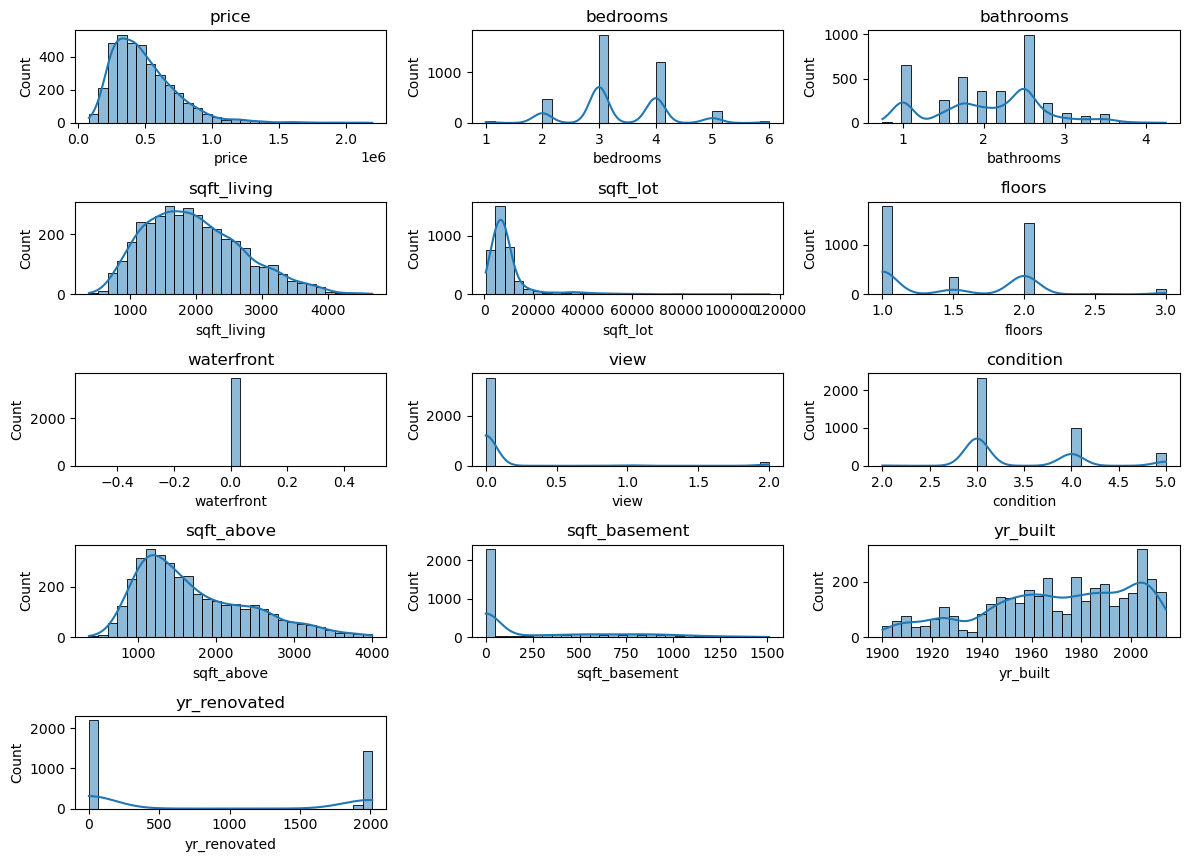

In [632]:
numerical_cols = df1.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(12, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(6, 3, i+1)
    sns.histplot(df1[col], bins = 30, kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

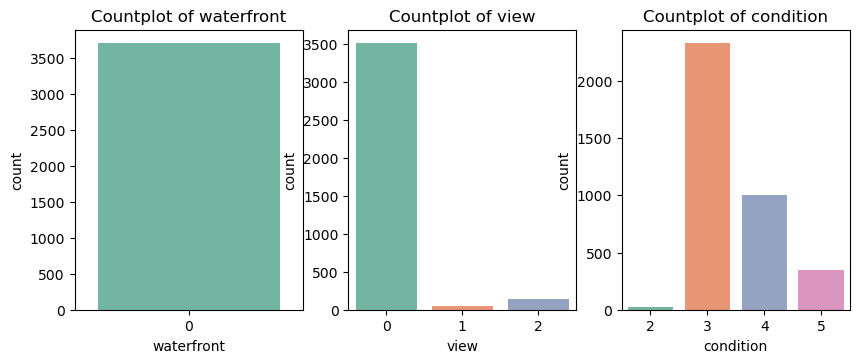

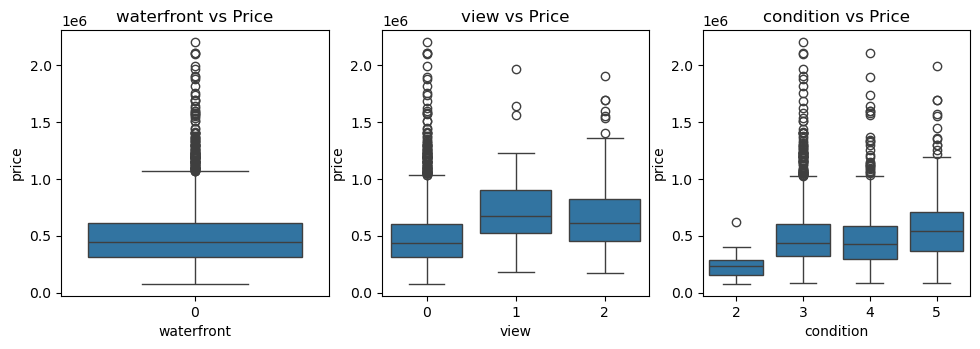

In [633]:
categorical_cols = ['waterfront', 'view', 'condition']  # adjust as needed

plt.figure(figsize=(10,8))
for i, col in enumerate(categorical_cols):
    plt.subplot(2,3,i+1)
    sns.countplot(x=col, data=df1, palette='Set2', hue=col,legend=False)
    plt.title(f'Countplot of {col}')
plt.show()
plt.figure(figsize=(20,20))

for i, col in enumerate(categorical_cols):
    # Boxplot to see effect on price
    plt.subplot(5,5,i+1)
    sns.boxplot(x=col, y='price', data=df1)
    plt.title(f'{col} vs Price')
plt.show()

The counts of both houeses with a waterfront and houses with a view rating larger than is minimal, and can therfore be dropped with the reason that they will have a small impact on the overall result.
Outliers are detected in the box plots. There seems to be a few houses with a very high price. These houses are likely to be outliers and can be removed.

C:\Users\USER-PC\AppData\Local\Temp\ipykernel_24796\2394797060.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_counts.index, y=city_counts.values, palette="viridis")


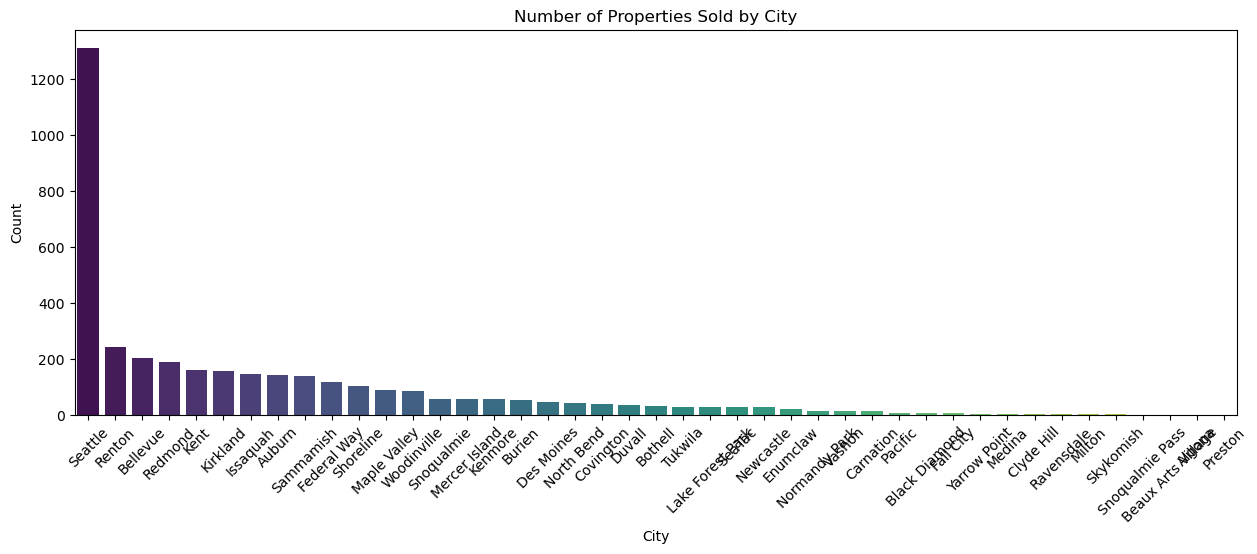

In [634]:
plt.figure(figsize=(15, 5))
city_counts = df1['city'].value_counts()
sns.barplot(x=city_counts.index, y=city_counts.values, palette="viridis")
plt.title('Number of Properties Sold by City')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Based on the counts of houses in each city, Seattle emerges as the dominant market, with approximately 1400 sales—far surpassing other cities like Bellevue, Renton, and Kent, which have fewer than 200 sales each. Smaller cities have even fewer transactions, most with sales below 100.

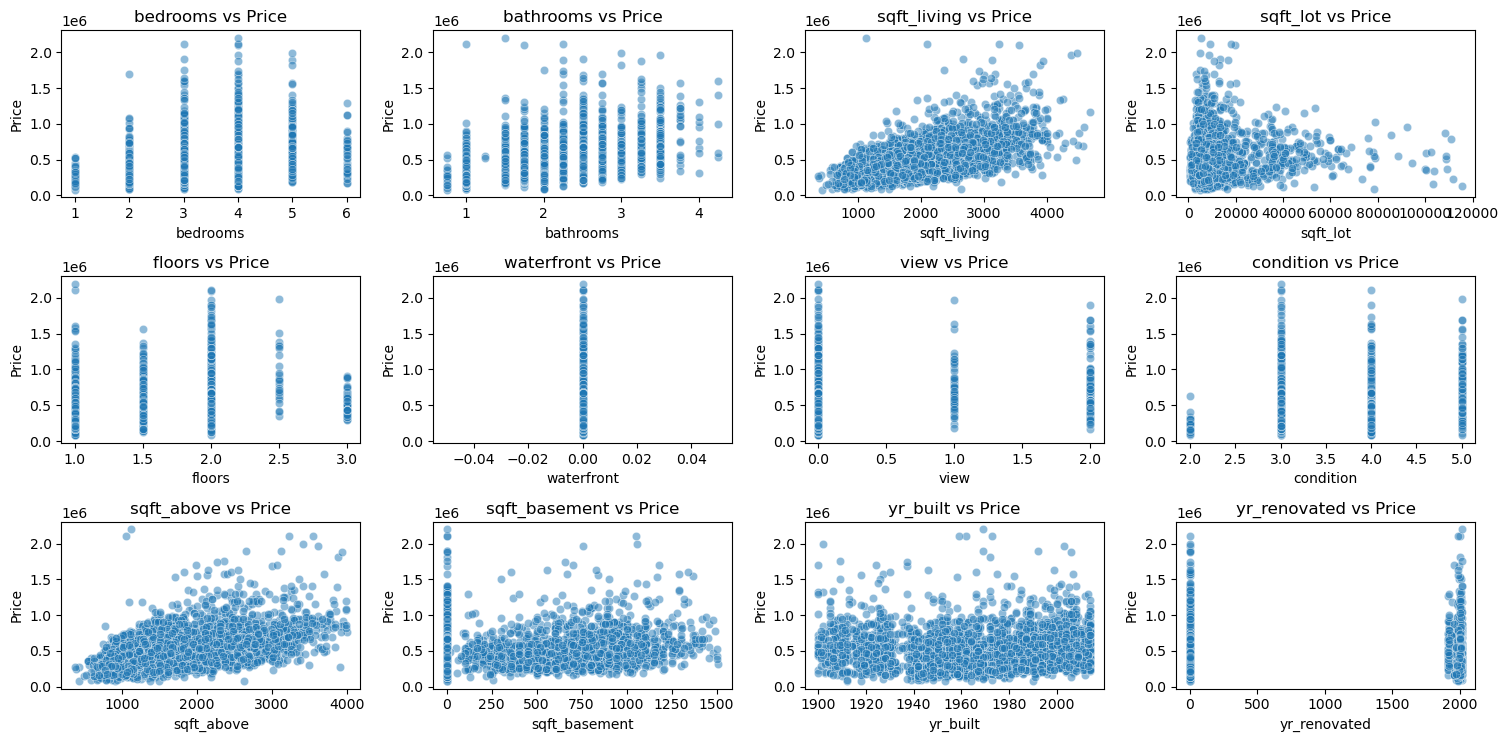

In [635]:
# Assuming 'features' is your list of selected features (excluding 'price')
plt.figure(figsize=(15, 12))
for i, feature in enumerate(numeric_features):
    # Skip non-numeric columns if any accidentally added
        plt.subplot(5,4,i+1)
        sns.scatterplot(x=df1[feature], y=df['price'], alpha=0.5)
        plt.title(f'{feature} vs Price')
        plt.xlabel(feature)
        plt.ylabel('Price')
plt.tight_layout()
plt.show()

In [636]:
city_counts = df1['city'].value_counts()
df1['city_frequency'] = df1['city'].map(city_counts)

## Correlation Matrix for Price

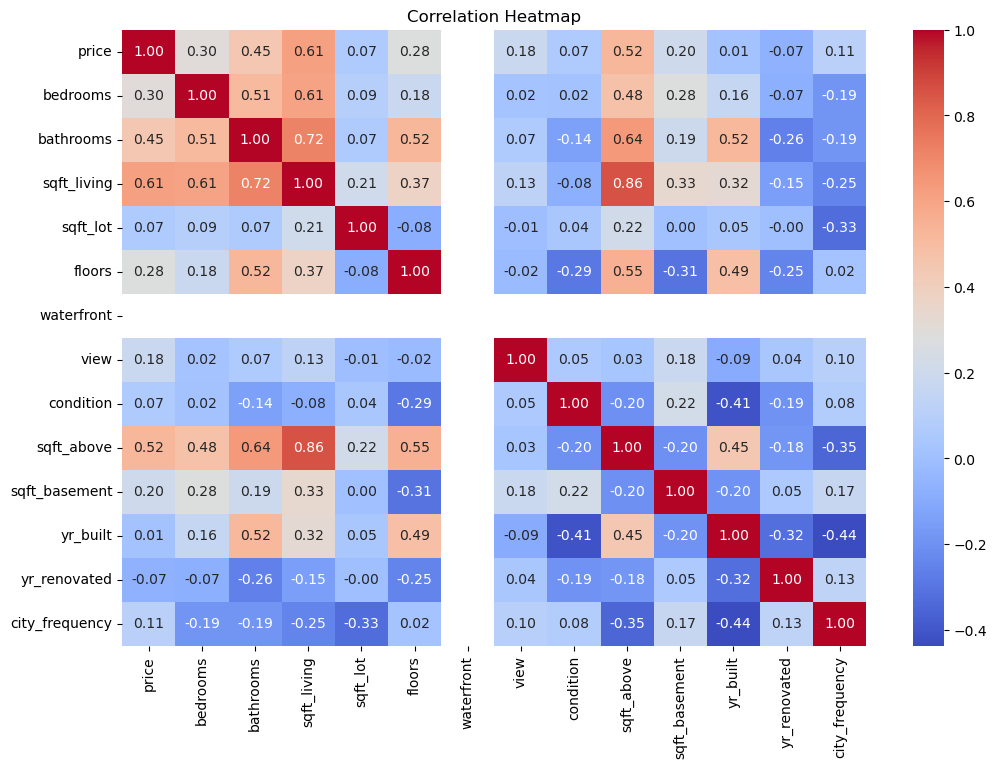

In [637]:
plt.figure(figsize=(12, 8))
corr = df1.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

City may be considered for removal from the data as it has little to no correlation with the other variables.

## Box Plots

<Axes: ylabel='price'>

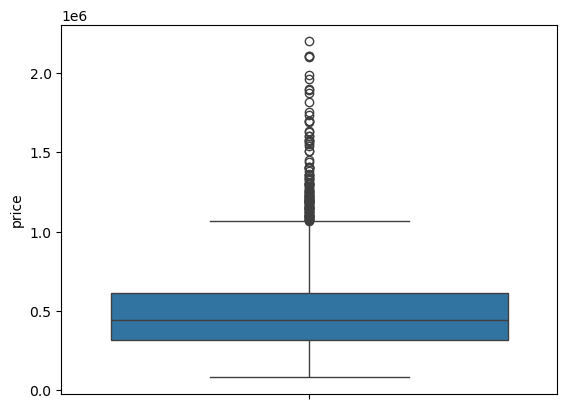

In [638]:
sns.boxplot(y=df1['price'])

# Data Preperation

## Removing Uneeded Features

In [639]:
df2=df1.drop(['date','street','country', 'city', 'statezip'],axis=1)
df2.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city_frequency
0,376000.00,3.00,2.00,1340,1384,3.00,0,0,3,1340,0,2008,0,1311
3,324000.00,3.00,2.25,998,904,2.00,0,0,3,798,200,2007,0,1311
4,549900.00,5.00,2.75,3060,7015,1.00,0,0,5,1600,1460,1979,0,1311
5,320000.00,3.00,2.50,2130,6969,2.00,0,0,3,2130,0,2003,0,88
6,875000.00,4.00,2.00,2520,6000,1.00,0,0,3,1400,1120,1921,2007,1311


In [640]:
pd.set_option('display.float_format', '{:.2f}'.format)
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
price,3708.00,494409.98,251730.33,80000.00,315000.00,442500.00,615000.00,2199900.00
bedrooms,3708.00,3.33,0.85,1.00,3.00,3.00,4.00,6.00
bathrooms,3708.00,2.07,0.69,0.75,1.75,2.25,2.50,4.25
sqft_living,3708.00,1982.81,742.06,370.00,1420.00,1900.00,2460.00,4680.00
sqft_lot,3708.00,10105.76,11615.83,638.00,4956.00,7405.50,10050.25,115434.00
floors,3708.00,1.50,0.53,1.00,1.00,1.50,2.00,3.00
waterfront,3708.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
view,3708.00,0.09,0.40,0.00,0.00,0.00,0.00,2.00
condition,3708.00,3.45,0.67,2.00,3.00,3.00,4.00,5.00
sqft_above,3708.00,1717.58,714.36,370.00,1160.00,1530.00,2190.00,4000.00


## Feature Engineering

In [641]:
df2['price_per_sqft'] = df2['price'] / df2['sqft_living']
df2['total_sqft'] = df2['sqft_above'] + df2['sqft_basement']
df2['house_age'] = 2025 - df2['yr_built']
df2['is_renovated'] = np.where(df2['yr_renovated'] > 0, 1, 0)

df2.drop(['yr_renovated', 'waterfront', 'view', 'yr_built', 'sqft_living','sqft_basement','sqft_above', 'sqft_lot', 'city_frequency'], inplace=True, axis=1)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3708 entries, 0 to 4139
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           3708 non-null   float64
 1   bedrooms        3708 non-null   float64
 2   bathrooms       3708 non-null   float64
 3   floors          3708 non-null   float64
 4   condition       3708 non-null   int64  
 5   price_per_sqft  3708 non-null   float64
 6   total_sqft      3708 non-null   int64  
 7   house_age       3708 non-null   int64  
 8   is_renovated    3708 non-null   int32  
dtypes: float64(5), int32(1), int64(3)
memory usage: 404.2 KB


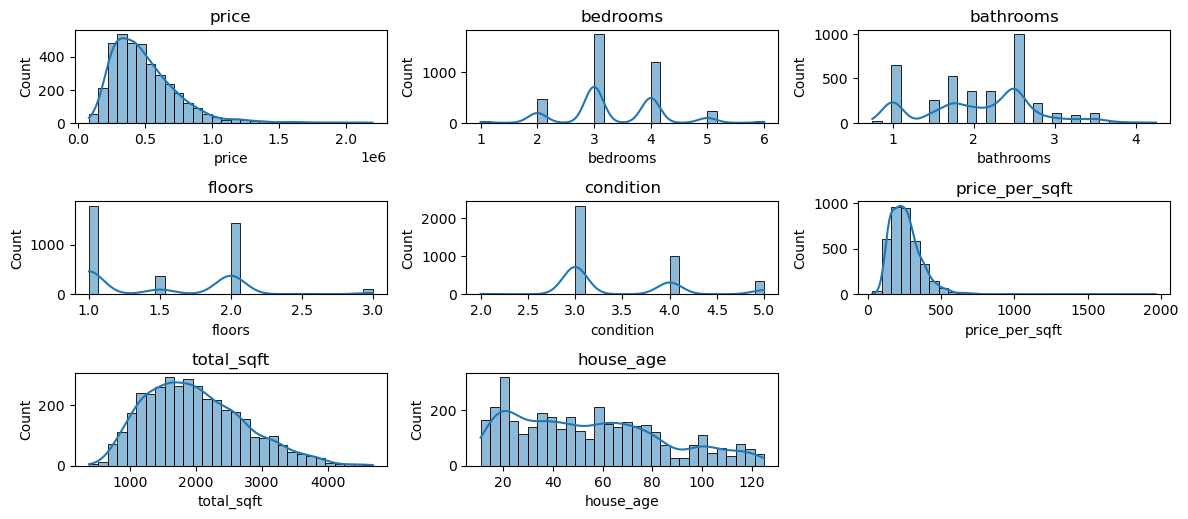

In [642]:
numerical_cols = df2.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(12, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(6, 3, i+1)
    sns.histplot(df2[col], bins = 30, kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

## Data Transformations

In [643]:
for col in numerical_cols:
    print(f'{col} = {df2[col].skew()}')

price = 1.677573458856155
bedrooms = 0.2099248052862759
bathrooms = -0.008800227836981173
floors = 0.558901485919026
condition = 1.0512765450752395
price_per_sqft = 2.087679341847165
total_sqft = 0.5496248818496164
house_age = 0.48182023431028387


Based on the distibution graph as well as the skewness data, two features are identified as being skew, that being Price and Price_per_sqft.
Thus we shall apply transformations on these two features


In [644]:
df2['price'] = np.log1p(df2['price'])
df2['price_per_sqft'] = np.log1p(df2['price_per_sqft'])

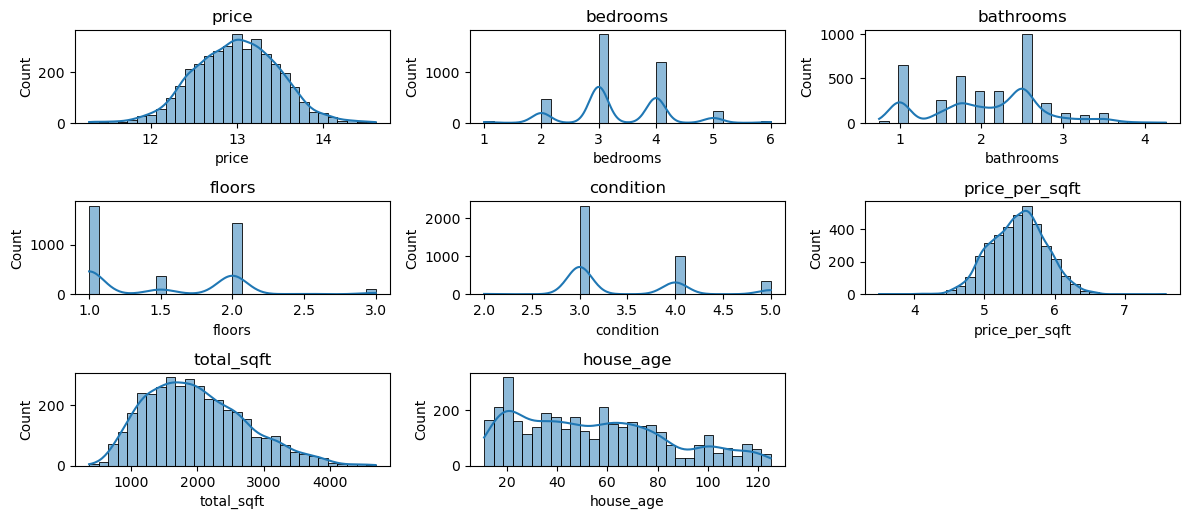

In [645]:
numerical_cols = df2.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(12, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(6, 3, i+1)
    sns.histplot(df2[col], bins = 30, kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

Now that the features have been transformed appropriatly, we can now scale the fetures using StandardScaler

## Scaling Features

In [646]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df2[numerical_cols] = scaler.fit_transform(df2[numerical_cols])

In [647]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
price,3708.00,0.00,1.00,-3.54,-0.70,0.01,0.69,3.34
bedrooms,3708.00,0.00,1.00,-2.76,-0.39,-0.39,0.79,3.16
bathrooms,3708.00,0.00,1.00,-1.92,-0.46,0.26,0.63,3.18
floors,3708.00,0.00,1.00,-0.94,-0.94,-0.00,0.94,2.81
condition,3708.00,-0.00,1.00,-2.17,-0.68,-0.68,0.82,2.31
price_per_sqft,3708.00,-0.00,1.00,-5.06,-0.71,0.04,0.68,5.37
total_sqft,3708.00,0.00,1.00,-2.17,-0.76,-0.11,0.64,3.64
house_age,3708.00,0.00,1.00,-1.45,-0.89,-0.15,0.68,2.35
is_renovated,3708.00,0.41,0.49,0.00,0.00,0.00,1.00,1.00


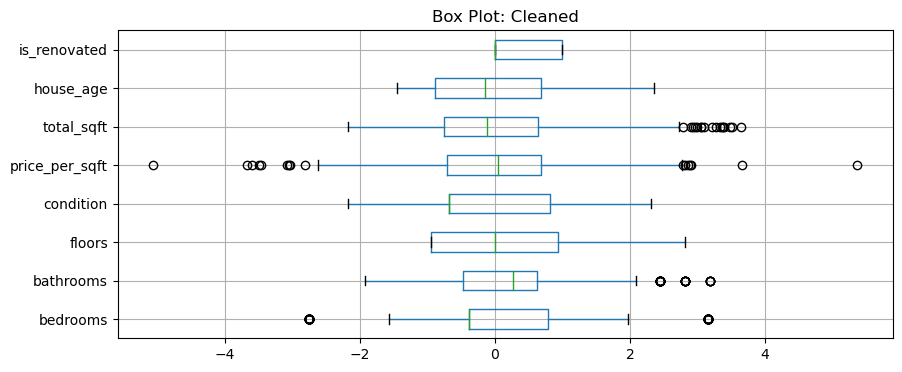

In [648]:
features = df2.columns.drop(out_var).tolist()
fig, ax = plt.subplots(figsize =(10,4))
boxplot =df2[features].boxplot(vert = 0, ax=ax)
_ = ax.set_title(f'Box Plot: Cleaned')

In [649]:
df2 = remove_outliers_zscore(df2)

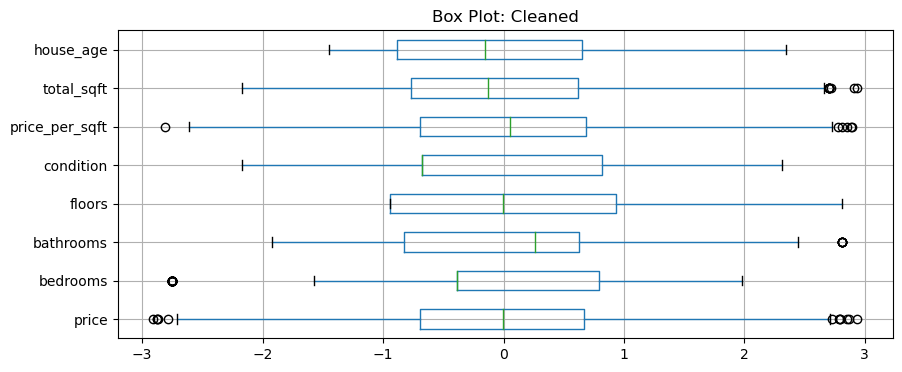

In [650]:
features = df2.columns.drop('is_renovated').tolist()
fig, ax = plt.subplots(figsize =(10,4))
boxplot =df2[features].boxplot(vert = 0, ax=ax)
_ = ax.set_title(f'Box Plot: Cleaned')

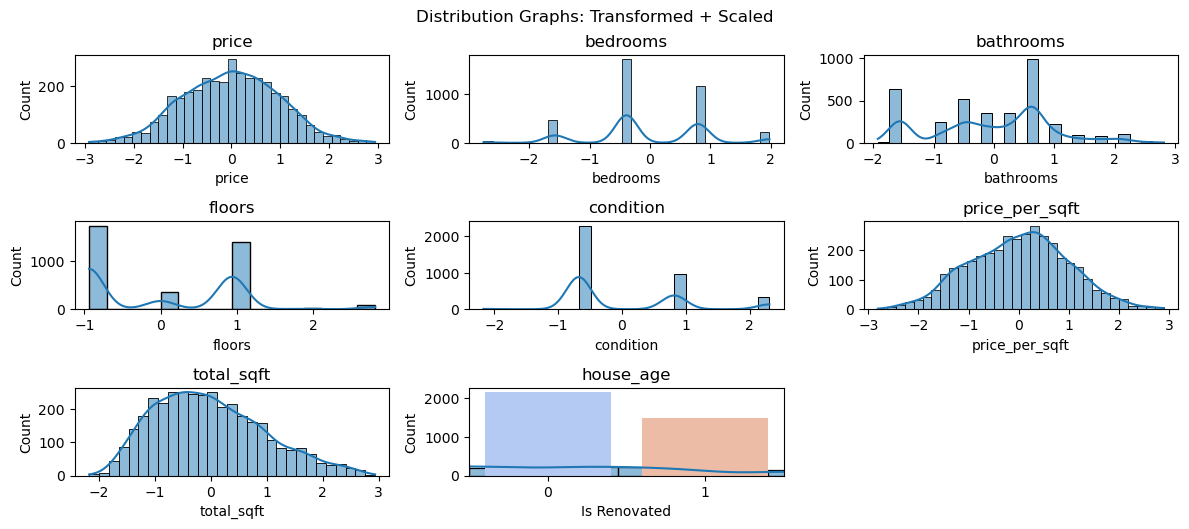

In [651]:
numerical_cols = df2[features].select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(12, 10))
plt.suptitle('Distribution Graphs: Transformed + Scaled')
for i, col in enumerate(numerical_cols):
    plt.subplot(6, 3, i+1)
    sns.histplot(df2[col], kde=True)
    plt.title(col)

sns.countplot(x='is_renovated', data=df2, palette="coolwarm", hue = 'is_renovated', legend= False)
plt.xlabel('Is Renovated')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

## Revised Correlation Matrix

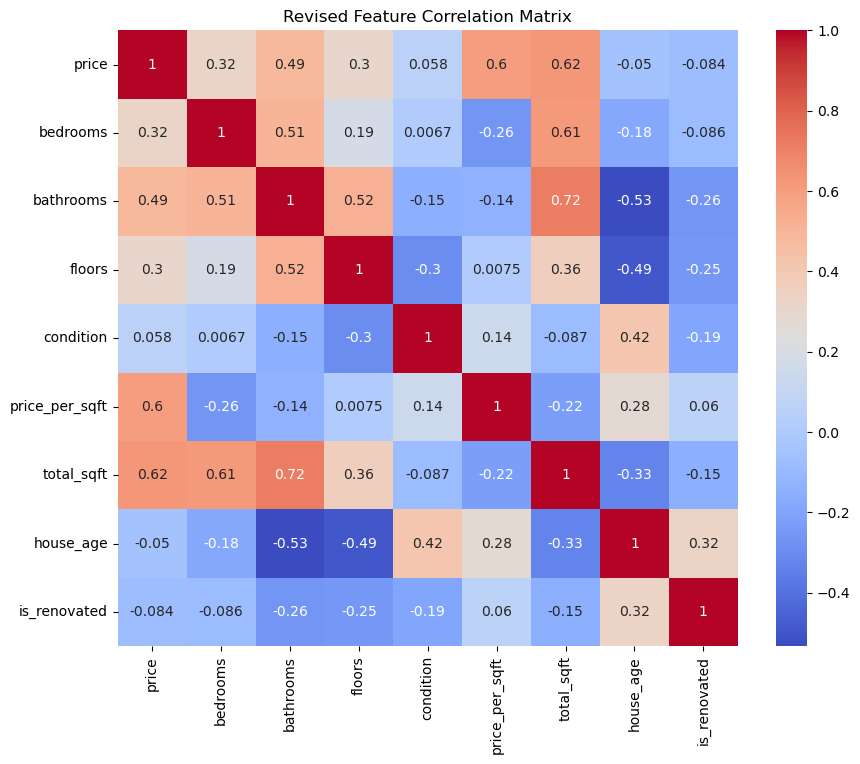

In [652]:
corr_matrix = df2.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Revised Feature Correlation Matrix")
plt.show()

## Distribution Graphs: Cleaned Data

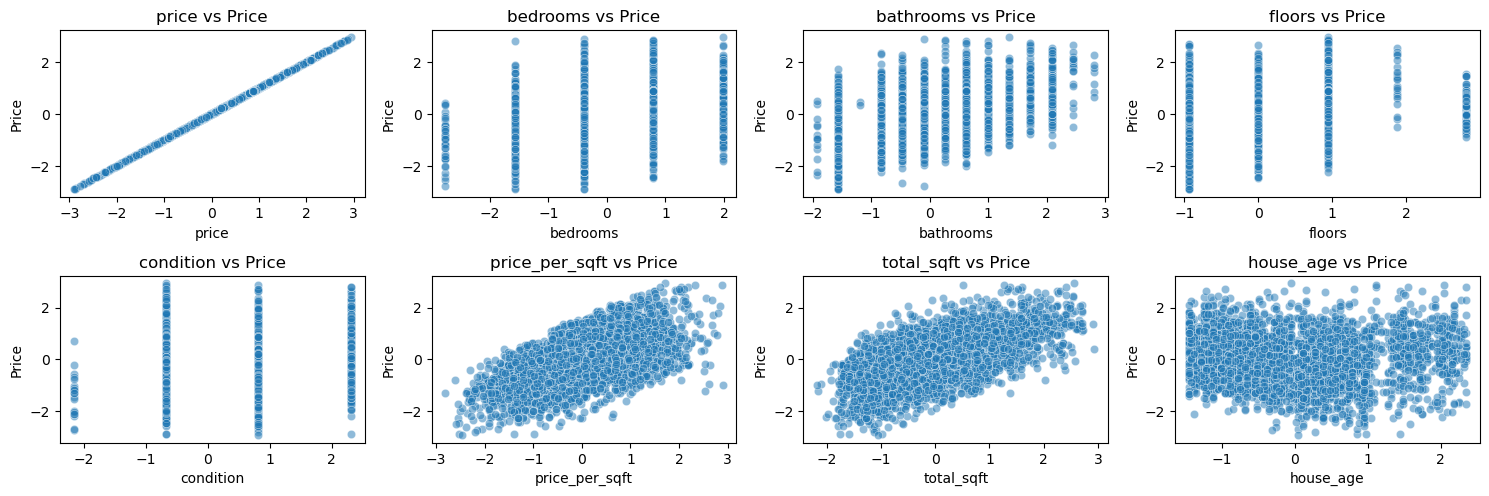

In [653]:
plt.figure(figsize=(15, 12))
for i, feature in enumerate(numerical_cols):
    # Skip non-numeric columns if any accidentally added
        plt.subplot(5,4,i+1)
        sns.scatterplot(x=df2[feature], y=df2['price'], alpha=0.5)
        plt.title(f'{feature} vs Price')
        plt.xlabel(feature)
        plt.ylabel('Price')
plt.tight_layout()
plt.show()

In [656]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
price,3632.00,-0.00,0.97,-2.91,-0.70,-0.00,0.67,2.94
bedrooms,3632.00,-0.03,0.95,-2.76,-0.39,-0.39,0.79,1.98
bathrooms,3632.00,-0.01,0.99,-1.92,-0.83,0.26,0.63,2.81
floors,3632.00,-0.00,1.00,-0.94,-0.94,-0.00,0.94,2.81
condition,3632.00,-0.00,1.00,-2.17,-0.68,-0.68,0.82,2.31
price_per_sqft,3632.00,0.01,0.97,-2.81,-0.69,0.05,0.68,2.90
total_sqft,3632.00,-0.02,0.97,-2.17,-0.77,-0.13,0.62,2.93
house_age,3632.00,-0.01,1.00,-1.45,-0.89,-0.15,0.65,2.35
is_renovated,3632.00,0.41,0.49,0.00,0.00,0.00,1.00,1.00
